In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the uploaded file to inspect its contents
file_path = './time_series_covid19_confirmed_US.csv' #Data from John Hopkins Whiting School of Engineering
covid_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
covid_data.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [41]:
import plotly.graph_objects as go #Documentation used from https://plotly.com/python/graph-objects/
covid_data_california = covid_data[covid_data["Province_State"] == "California"].groupby("Province_State").sum(numeric_only=True).drop(columns=["UID", "code3", "FIPS", "Lat", "Long_"])

# Transpose to have dates as rows
covid_data_california = covid_data_california.T

# Parse dates, handling potential format issues
covid_data_california.index = pd.to_datetime(covid_data_california.index, format='%m/%d/%y', errors='coerce')

# Drop any rows with invalid dates after parsing
covid_data_california = covid_data_california.dropna()


# Create the interactive plot using Plotly
fig = go.Figure()

# Add a line trace for each state
fig.add_trace(go.Scatter(
    x=covid_data_california.index,
    y=covid_data_california["California"],
    mode='lines',
    name="California",
    hoverinfo='text',
    text=[f'California: {int(cases)} cases' for cases in covid_data_california["California"]],
    line=dict(width=2, color='blue')
))

# Customize layout
fig.update_layout(
    title="COVID-19 Confirmed Cases Over Time for All U.S. States",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases",
    template="plotly_dark",
    hovermode="x unified",  # Combine hover data for all states at the same date
    legend_title="U.S. States"
)

# Show interactive plot
fig.show()

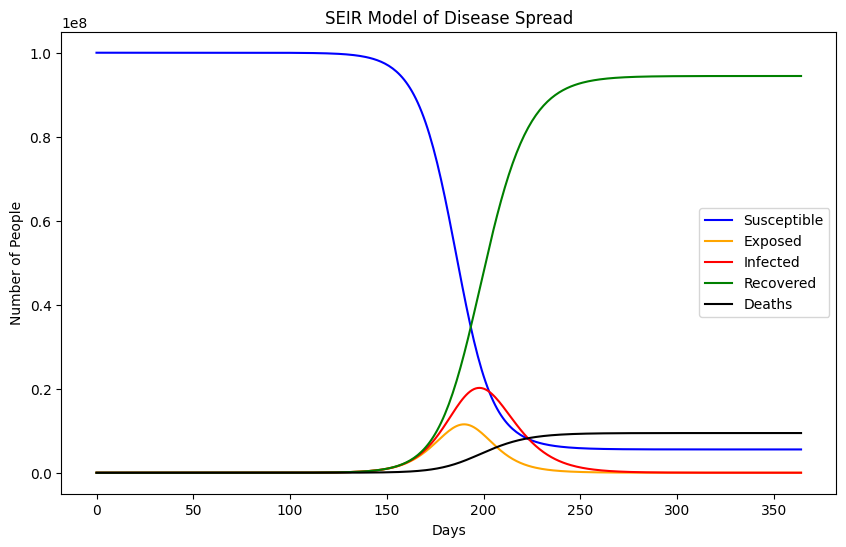

In [42]:
#Simulation of a disease spread using SIR model

# Parameters for SEIR
population = 100000000
initial_infected = 1
initial_exposed = 0
initial_recovered = 0
beta = 0.3       # Infection rate
gamma = 0.1      # Recovery rate
sigma = 0.2      # Rate of exposed to infected
delta = 0.01     # Mortality rate
days = 365
#vaccination_rate = 0.02

# Initial conditions
S = population - initial_infected - initial_exposed - initial_recovered
E = initial_exposed
I = initial_infected
R = initial_recovered
D = 0
#V = 0

# Lists to store results
susceptible, exposed, infected, recovered, deaths = [S], [E], [I], [R], [D]

# SEIR model simulation
for day in range(1, days):
    new_exposed = (beta * S * I) / population
    new_infections = sigma * E
    new_recoveries = gamma * I
    new_deaths = delta * I
    #new_vaccinations = vaccination_rate * S

    # Update values
    S -= new_exposed
    E += new_exposed - new_infections
    I += new_infections - new_recoveries
    R += new_recoveries
    D += new_deaths
    #V += new_vaccinations

    # Store results
    susceptible.append(S)
    exposed.append(E)
    infected.append(I)
    recovered.append(R)
    deaths.append(D)
    #vaccinated.append(V)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible, label='Susceptible', color='blue')
plt.plot(exposed, label='Exposed', color='orange')
plt.plot(infected, label='Infected', color='red')
plt.plot(recovered, label='Recovered', color='green')
plt.plot(deaths, label='Deaths', color='black')
#plt.plot(vaccinated, label='Vaccinated', color='purple')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.title('SEIR Model of Disease Spread')
plt.legend()
plt.show()


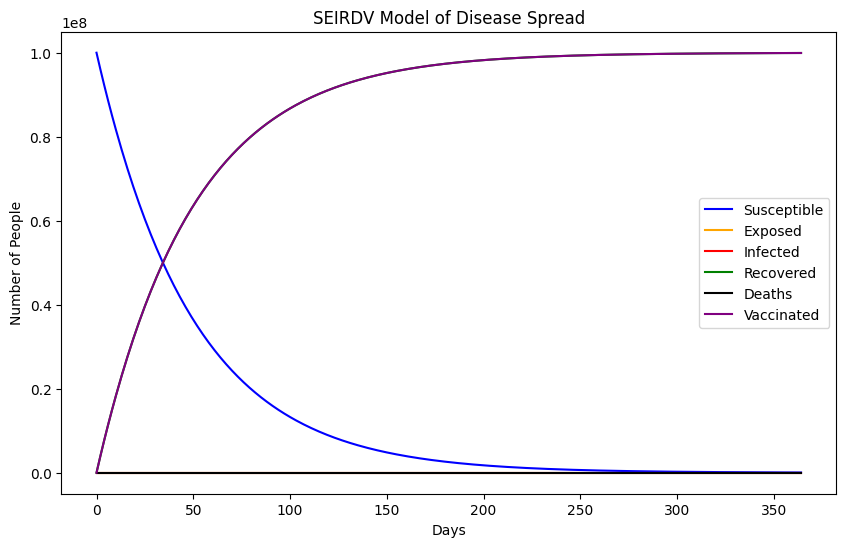

In [44]:
#Simulation of a disease spread using SIR model

# Parameters for SEIR
population = 100000000
initial_infected = 1
initial_exposed = 0
initial_recovered = 0
beta = 0.3       # Infection rate
gamma = 0.1      # Recovery rate
sigma = 0.2      # Rate of exposed to infected
delta = 0.01     # Mortality rate
days = 365
vaccination_rate = 0.02

# Initial conditions
S = population - initial_infected - initial_exposed - initial_recovered
E = initial_exposed
I = initial_infected
R = initial_recovered
D = 0
V = 0

# Lists to store results
susceptible, exposed, infected, recovered, deaths, vaccinated = [S], [E], [I], [R], [D], [V]

# SEIR model simulation
for day in range(1, days):
    new_exposed = (beta * S * I) / population
    new_infections = sigma * E
    new_recoveries = gamma * I
    new_deaths = delta * I
    new_vaccinations = vaccination_rate * S

    # Update values
    S -= new_exposed + new_vaccinations
    E += new_exposed - new_infections
    I += new_infections - new_recoveries
    R += new_recoveries + new_vaccinations
    D += new_deaths
    V += new_vaccinations

    # Store results
    susceptible.append(S)
    exposed.append(E)
    infected.append(I)
    recovered.append(R)
    deaths.append(D)
    vaccinated.append(V)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(susceptible, label='Susceptible', color='blue')
plt.plot(exposed, label='Exposed', color='orange')
plt.plot(infected, label='Infected', color='red')
plt.plot(recovered, label='Recovered', color='green')
plt.plot(deaths, label='Deaths', color='black')
plt.plot(vaccinated, label='Vaccinated', color='purple')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.title('SEIRDV Model of Disease Spread')
plt.legend()
plt.show()
